# Лаборатоная работа №3

# Бинарная классификация

<div style = "font-size: 16px">
    <p><b>Цель работы: </b>изучение принципов решения задачи классификации с использованием методов машинного обучения.<p>
    <p>Набор данных связан с кампаниями прямого маркетинга банковского учреждения. Маркетинговые кампании были основаны на телефонных звонках. Часто требовалось более одного контакта с одним и тем же клиентом, чтобы узнать, будет ли у него подписка на продукт (банковский срочный депозит). Цель классификации – предсказать, подпишется ли клиент на срочный депозит (переменная у).</p>
    <p>Атрибуты:</p>
    <p>Данные банковские клиента:</p>
    <ul>
    <li> <b>age</b> – возраст (числовой);</li>
    <li> <b>job</b> – тип работы (категория: "администратор", "неизвестный", безработный",
"менеджер", "горничная", "предприниматель", "студент", "рабочий", "самозанятый","пенсионер", "техник", "услуги");</li>
    <li> <b>marital</b> – семейное положение (категория: "женат", "разведен", "холост"; примечание: "разведен" означает разведенный или овдовевший);</li>
    <li> <b>education</b> – образование (категория: "неизвестно", "среднее", "начальное",
"высшее");</li>
    <li> <b>default</b> – просрочен ли кредит? (двоичный код: "да", "нет");</li>
    <li> <b>balance</b> – среднегодовой баланс в евро (числовой);</li>
    <li> <b>housing</b> – есть ссуда на жилье? (двоичные значения: "да", "нет");</li>
    <li> <b>loan</b> – есть ссуда на личные нужды? (двоичные значения: "да", "нет").</li>
    </ul>
    <p>Последний контакт в рамках текущей кампании:</p>
    <ul>
    <li> <b>contact</b> – тип связи с контактом (категория: "неизвестно", "телефон", "сотовый");</li>
    <li> <b>day</b> – последний день контакта в месяце (числовой);</li>
    <li> <b>month</b> – месяц последнего контакта в году (категория: "январь", "февраль",
"март", ... , "ноябрь", "декабрь");</li>
    <li> <b>duration</b> – продолжительность последнего контакта в секундах (числовая).</li>
    </ul>
    <p>Другие атрибуты:</p>
    <ul>
    <li> <b>campaign</b> – количество контактов, осуществленных в ходе этой кампании и для
данного клиента (числовой, включает последний контакт);</li>
    <li> <b>pdays</b> – количество дней, прошедших с момента последнего контакта с клиентом в рамках предыдущей кампании (числовой, -1 означает, что ранее с клиентом не связывались);</li>
    <li> <b>previous</b> – количество контактов, осуществленных до этой кампании и для данного клиента (числовой);</li>
    <li> <b>poutcome</b> – результат предыдущей маркетинговой кампании (категория: "неизвестно", "другое", "неудача", "успех").</li>
    </ul>
    <p>Выходная переменная (целевая):</p>
    <ul>
    <li> <b>у</b> – клиент подпишется на срочный депозит? (двоичный код: "да", "нет")</li>
    </ul>
</div>


### 1. Импортируйте необходимые библиотеки

In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("bank.csv", sep=';')
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,cellular,19,oct,79,1,-1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,cellular,11,may,220,1,339,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,cellular,16,apr,185,1,330,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,unknown,3,jun,199,4,-1,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,unknown,5,may,226,1,-1,0,unknown,no


<p style = "font-size: 16px">Выведем целевую переменную, целевые имена и частоту каждого уникального значения:</p>

In [4]:
(unique, counts) = np.unique(df['y'], return_counts=True)
print('Unique values of the target variable: ', unique)
print('Counts of the target variable:' , counts)

Unique values of the target variable:  ['no' 'yes']
Counts of the target variable: [4000  521]


<p style = "font-size: 16px">Построим столбчатую диаграмму, чтобы увидеть целевую переменную:</p>

<Axes: xlabel='y', ylabel='count'>

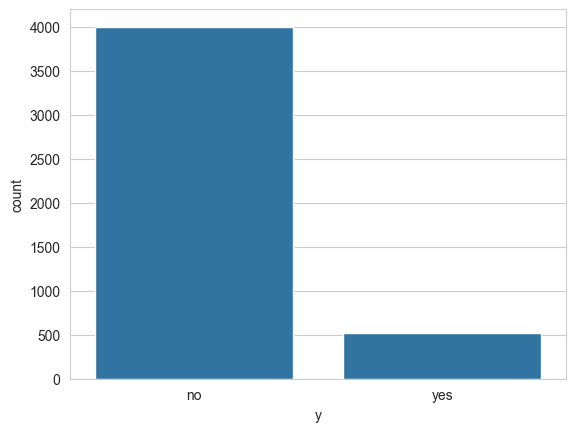

In [5]:
sns.set_style("whitegrid")
sns.countplot(df, x = 'y')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4521 entries, 0 to 4520
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        4521 non-null   int64 
 1   job        4521 non-null   object
 2   marital    4521 non-null   object
 3   education  4521 non-null   object
 4   default    4521 non-null   object
 5   balance    4521 non-null   int64 
 6   housing    4521 non-null   object
 7   loan       4521 non-null   object
 8   contact    4521 non-null   object
 9   day        4521 non-null   int64 
 10  month      4521 non-null   object
 11  duration   4521 non-null   int64 
 12  campaign   4521 non-null   int64 
 13  pdays      4521 non-null   int64 
 14  previous   4521 non-null   int64 
 15  poutcome   4521 non-null   object
 16  y          4521 non-null   object
dtypes: int64(7), object(10)
memory usage: 600.6+ KB


### 2. Проверяем наличие пропущенных значений и выбросов

In [7]:
# проверяем на пропущенные значения
print(df.isnull().sum())

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
y            0
dtype: int64


<Axes: xlabel='age'>

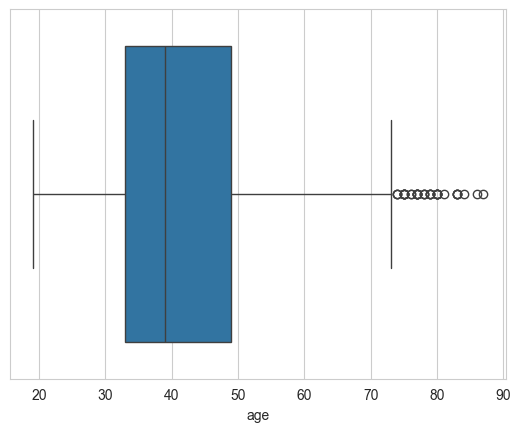

In [8]:
# Проверяем нвыбросы
sns.boxplot(x=df['age'])

### 3. Исключаем невлияющие категориальные признаки

In [43]:
df_copy = df.copy()
drop_feat = ['contact', 'day', 'month', 'pdays']
df_copy.drop(drop_feat, axis=1, inplace=True)
df_copy.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y
0,30,unemployed,married,primary,no,1787,no,no,79,1,0,unknown,no
1,33,services,married,secondary,no,4789,yes,yes,220,1,4,failure,no
2,35,management,single,tertiary,no,1350,yes,no,185,1,1,failure,no
3,30,management,married,tertiary,no,1476,yes,yes,199,4,0,unknown,no
4,59,blue-collar,married,secondary,no,0,yes,no,226,1,0,unknown,no


<p style = "font-size: 16px">Признаки deafult, housing, loan и y имеют два значения - no и yes. Эти признаки, по сути, бинарные и можно использовать значения 0 и 1.</p>

In [44]:
binary_map = {'no': 0, 'yes': 1}
binary_features = ['default', 'housing', 'loan', 'y']
for feature in binary_features:
    df_copy[feature] = df_copy[feature].map(binary_map)
df_copy.head()

,age,job,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y
0,30,unemployed,married,primary,0,1787,0,0,79,1,0,unknown,0
1,33,services,married,secondary,0,4789,1,1,220,1,4,failure,0
2,35,management,single,tertiary,0,1350,1,0,185,1,1,failure,0
3,30,management,married,tertiary,0,1476,1,1,199,4,0,unknown,0
4,59,blue-collar,married,secondary,0,0,1,0,226,1,0,unknown,0


In [45]:
df_copy['job_indicator'] = np.where(df_copy['job'] == 'unemployed', 0, 1)
df_copy.drop('job', axis=1, inplace=True)
df_copy.head()

,age,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y,job_indicator
0,30,married,primary,0,1787,0,0,79,1,0,unknown,0,0
1,33,married,secondary,0,4789,1,1,220,1,4,failure,0,1
2,35,single,tertiary,0,1350,1,0,185,1,1,failure,0,1
3,30,married,tertiary,0,1476,1,1,199,4,0,unknown,0,1
4,59,married,secondary,0,0,1,0,226,1,0,unknown,0,1


In [46]:
marital_map = {'single': 0, 'married': 1, 'divorced': 2}
df_copy['marital'] = df_copy['marital'].map(marital_map)

education_map = {'unknown': 0, 'primary': 1, 'secondary': 2, 'tertiary': 3}
df_copy['education'] = df_copy['education'].map(education_map)

poutcome_map = {'unknown': 0, 'failure': 1, 'other': 2, 'success': 3}
df_copy['poutcome'] = df_copy['poutcome'].map(poutcome_map)

df_copy.head()

,age,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y,job_indicator
0,30,1,1,0,1787,0,0,79,1,0,0,0,0
1,33,1,2,0,4789,1,1,220,1,4,1,0,1
2,35,0,3,0,1350,1,0,185,1,1,1,0,1
3,30,1,3,0,1476,1,1,199,4,0,0,0,1
4,59,1,2,0,0,1,0,226,1,0,0,0,1


In [47]:
#Повторная проверка
df_copy.isnull().sum()

age              0
marital          0
education        0
default          0
balance          0
housing          0
loan             0
duration         0
campaign         0
previous         0
poutcome         0
y                0
job_indicator    0
dtype: int64

### 4. Разделяем данные на признаки и целевую переменную

In [23]:
y = df_copy['y']
X = df_copy.drop('y', axis = 1)
X

,age,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,job_indicator
0,30,1,1,0,1787,0,0,79,1,0,0,0
1,33,1,2,0,4789,1,1,220,1,4,1,1
2,35,0,3,0,1350,1,0,185,1,1,1,1
3,30,1,3,0,1476,1,1,199,4,0,0,1
4,59,1,2,0,0,1,0,226,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4516,33,1,2,0,-333,1,0,329,5,0,0,1
4517,57,1,3,1,-3313,1,1,153,1,0,0,1
4518,57,1,2,0,295,0,0,151,11,0,0,1
4519,28,1,2,0,1137,0,0,129,4,3,2,1


### 5. Применяем операцию нормализации для численной устойчивости

In [30]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)
X

array([[-1.05626965,  0.24642938, -1.36512338, ..., -0.32041282,
        -0.41430603, -5.85835408],
       [-0.77258281,  0.24642938, -0.08441726, ...,  2.04173372,
         1.05939778,  0.17069641],
       [-0.58345826, -1.42139579,  1.19628886, ...,  0.27012381,
         1.05939778,  0.17069641],
       ...,
       [ 1.49691189,  0.24642938, -0.08441726, ..., -0.32041282,
        -0.41430603,  0.17069641],
       [-1.24539421,  0.24642938, -0.08441726, ...,  1.45119709,
         2.53310159,  0.17069641],
       [ 0.26760226, -1.42139579,  1.19628886, ...,  3.81334363,
         2.53310159,  0.17069641]], shape=(4521, 12))

### 6. Разделяем данные на тренировочный и тестовый наборы

In [31]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.25, random_state=0)

### 7. Обучаем модель логистической регрессии

In [32]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

,"penalty penalty: {'l1', 'l2', 'elasticnet', None}, default='l2'Specify the norm of the penalty:- `None`: no penalty is added;- `'l2'`: add a L2 penalty term and it is the default choice;- `'l1'`: add a L1 penalty term;- `'elasticnet'`: both L1 and L2 penalty terms are added... warning:: Some penalties may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionadded:: 0.19 l1 penalty with SAGA solver (allowing 'multinomial' + L1).. deprecated:: 1.8 `penalty` was deprecated in version 1.8 and will be removed in 1.10. Use `l1_ratio` instead. `l1_ratio=0` for `penalty='l2'`, `l1_ratio=1` for `penalty='l1'` and `l1_ratio` set to any float between 0 and 1 for `'penalty='elasticnet'`.",'deprecated'
,"C C: float, default=1.0Inverse of regularization strength; must be a positive float.Like in support vector machines, smaller values specify strongerregularization. `C=np.inf` results in unpenalized logistic regression.For a visual example on the effect of tuning the `C` parameterwith an L1 penalty, see::ref:`sphx_glr_auto_examples_linear_model_plot_logistic_path.py`.",1.0
,"l1_ratio l1_ratio: float, default=0.0The Elastic-Net mixing parameter, with `0 <= l1_ratio <= 1`. Setting`l1_ratio=1` gives a pure L1-penalty, setting `l1_ratio=0` a pure L2-penalty.Any value between 0 and 1 gives an Elastic-Net penalty of the form`l1_ratio * L1 + (1 - l1_ratio) * L2`... warning:: Certain values of `l1_ratio`, i.e. some penalties, may not work with some solvers. See the parameter `solver` below, to know the compatibility between the penalty and solver... versionchanged:: 1.8 Default value changed from None to 0.0... deprecated:: 1.8 `None` is deprecated and will be removed in version 1.10. Always use `l1_ratio` to specify the penalty type.",0.0
,"dual dual: bool, default=FalseDual (constrained) or primal (regularized, see also:ref:`this equation `) formulation. Dual formulationis only implemented for l2 penalty with liblinear solver. Prefer `dual=False`when n_samples > n_features.",False
,"tol tol: float, default=1e-4Tolerance for stopping criteria.",0.0001
,"fit_intercept fit_intercept: bool, default=TrueSpecifies if a constant (a.k.a. bias or intercept) should beadded to the decision function.",True
,"intercept_scaling intercept_scaling: float, default=1Useful only when the solver `liblinear` is usedand `self.fit_intercept` is set to `True`. In this case, `x` becomes`[x, self.intercept_scaling]`,i.e. a ""synthetic"" feature with constant value equal to`intercept_scaling` is appended to the instance vector.The intercept becomes``intercept_scaling * synthetic_feature_weight``... note:: The synthetic feature weight is subject to L1 or L2 regularization as all other features. To lessen the effect of regularization on synthetic feature weight (and therefore on the intercept) `intercept_scaling` has to be increased.",1
,"class_weight class_weight: dict or 'balanced', default=NoneWeights associated with classes in the form ``{class_label: weight}``.If not given, all classes are supposed to have weight one.The ""balanced"" mode uses the values of y to automatically adjustweights inversely proportional to class frequencies in the input dataas ``n_samples / (n_classes * np.bincount(y))``.Note that these weights will be multiplied with sample_weight (passedthrough the fit method) if sample_weight is specified... versionadded:: 0.17 *class_weight='balanced'*",None
,"random_state random_state: int, RandomState instance, default=NoneUsed when ``solver`` == 'sag', 'saga' or 'liblinear' to shuffle thedata. See :term:`Glossary ` for details.",None
,"solver solver: {'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}, default='lbfgs'Algorithm to use in the optimization problem. Default is 'lbfgs'.To choose a solver, you might want to consider the following aspects:- 'lbfgs' is a good default solver because it works reasonably well for a wide class of problems.- For :term:`mul

### 8. Делаем прогноз на основе данных тестирования

In [33]:
y_pred = model.predict(X_test)

### 9. Рассчитываем показатели точности, сравнив фактические и прогнозируемые значения

In [34]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print('True Positive(TP) = ', TP)
print('False Positive(FP) = ', FP)
print('True Negative(TN) = ', TN)
print('False Negative(FN) = ', FN)

accuracy = (TP+TN) /(TP+FP+TN+FN)
print('Accuracy of the binary classification = {:0.3f}'.format(accuracy))

True Positive(TP) =  41
False Positive(FP) =  23
True Negative(TN) =  970
False Negative(FN) =  97
Accuracy of the binary classification = 0.894


In [35]:
# оцениваем точность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy:', accuracy)

Accuracy: 0.8938992042440318


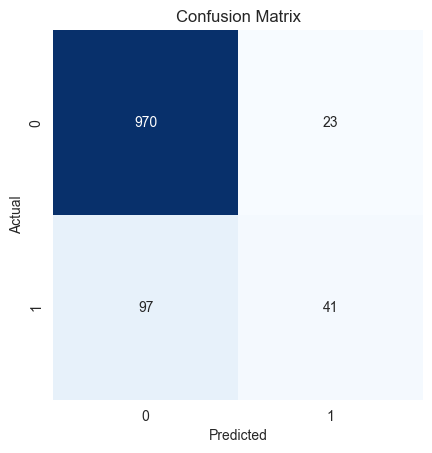

In [36]:
sns.heatmap(cm, square=True, annot=True, fmt='d', cbar=False, cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

In [37]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.89


In [38]:
from sklearn.metrics import  precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")

Точность: 0.64
Полнота: 0.30


In [39]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-мера: {f1:.2f}")

F1-мера: 0.41


In [40]:
df_copy.corr()

,age,marital,education,default,balance,housing,loan,duration,campaign,previous,poutcome,y,job_indicator
age,1.000000,0.381485,-0.199345,-0.017885,0.083820,-0.193888,-0.011250,-0.002367,-0.005148,-0.003511,0.025856,0.045092,0.004259
marital,0.381485,1.000000,-0.109124,0.020745,-0.024971,0.029851,0.045210,-0.006619,-0.005915,-0.038028,-0.032186,-0.015042,-0.022047
education,-0.199345,-0.109124,1.000000,-0.008835,0.035731,-0.031251,0.016102,-0.003246,0.019268,0.027320,0.023054,0.050265,0.010994
default,-0.017885,0.020745,-0.008835,1.000000,-0.070886,0.006881,0.063994,-0.011615,-0.012348,-0.026656,-0.031354,0.001303,-0.008799
balance,0.083820,-0.024971,0.035731,-0.070886,1.000000,-0.050227,-0.071349,-0.015950,-0.009976,0.026196,0.033941,0.017905,0.018902
housing,-0.193888,0.029851,-0.031251,0.006881,-0.050227,1.000000,0.018451,0.015740,-0.003574,0.038621,0.006302,-0.104683,0.038884
loan,-0.011250,0.045210,0.016102,0.063994,-0.071349,0.018451,1.000000,-0.004997,0.017120,-0.022115,-0.053685,-0.070517,0.024326
duration,-0.002367,-0.006619,-0.003246,-0.011615,-0.015950,0.015740,-0.004997,1.000000,-0.068382,0.018080,0.035247,0.401118,-0.024507
campaign,-0.005148,-0.005915,0.019268,-0.012348,-0.009976,-0.003574,0.017120,-0.068382,1.000000,-0.067833,-0.104276,-0.061147,0.006255
previous,-0.003511,-0.038028,0.027320,-0.026656,0.026196,0.038621,-0.022115,0.018080,-0.067833,1.000000,0.617602,0.116714,0.005867


### 10. Строим ROC-кривую

In [41]:
from sklearn.metrics import roc_curve, auc
# Получаем предсказание вероятности для класса 1
y_score = model.predict_proba(X_test)[:, 1]
# Рассчитываем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, y_score)
# (Опционально) Рассчитываем AUC (Area Under Curve) - площадь  под кривой
roc_auc = auc(fpr, tpr)

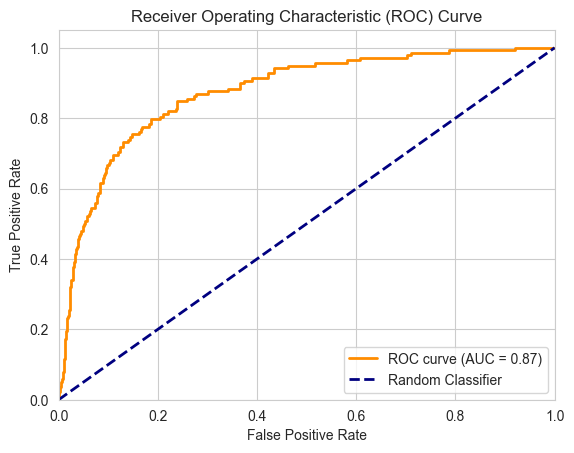

In [42]:
## Строим график
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random Classifier')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()